In [19]:
# 보스턴 하우스 프라이스 -> 규제 등등 내용 참고 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVC

from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

from sklearn.model_selection import cross_val_score, KFold, GridSearchCV

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

from sklearn.datasets import load_boston


# DataLoad

In [20]:
data_dict=load_boston()

In [21]:
df = pd.DataFrame(data=data_dict['data'], columns=data_dict['feature_names'] )
df['price'] = data_dict['target']
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [22]:
# col_list = [col.lower() for col in df.columns.tolist()]
# df.columns = col_list

df.columns = [col.lower() for col in df.columns.tolist()]
df.head(1)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


# 머신러닝으로 RMSE 점수 보기

In [23]:
y = df["price"]
X = df.drop(["price"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=1234)
model = LGBMRegressor()

model.fit(X_train, y_train)
pred = model.predict(X_test)

rmse = mean_squared_error(y_test, pred, squared=False)
print(f"RMSE:{rmse:.4f}")

RMSE:2.7499


# 딥러닝으로 RMSE 점수 보기

In [24]:
# ! pip install tensorflow
# ! pip install keras            # 분석을 위한 tensorflow 내 백엔드엔진

In [25]:
# !pip install tensorflow

In [26]:
import tensorflow as tf
from keras.models import Sequential  # layer 쌓았을 때 다 쌓은 상자가 Sequential
from keras.layers import Dense, Activation

## RandomSeed 언제나 일정하게 고정

In [27]:
np.random.seed(1024)
tf.random.set_seed(1024)

## data 확인

In [28]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
y=df['price']
X=df.drop(['price'], axis=1)

In [30]:
print(X.shape, y.shape)

(506, 13) (506,)


## 딥러닝은 모델 돌릴 때 임의로 train, test set 나눌 필요 없이 모델 내에서 나눠서 쓴다.

In [31]:
model=Sequential() # 전체를 감싸는 모델

# 모델 내에 레이어, Dense를 더해준다.
model.add(Dense(units=20, activation='relu', input_dim=13)) # input layer   # input_dim은 input에만 쓴다.
model.add(Dense(units=8, activation='relu'))                # hidden layer1
model.add(Dense(units=8, activation='relu'))                # hidden layer2
model.add(Dense(units=4, activation='relu'))                # hidden layer3
model.add(Dense(units=1))                                   # output layer # 회귀니까 activation 없이. unit=1(집값)

In [32]:
model.summary() # 561 비트(?)로 학습

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 20)                280       
                                                                 
 dense_11 (Dense)            (None, 8)                 168       
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 4)                 36        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [33]:
# compiler 에서 설정할 것 : lom설정(그냥 앞글자 따서)
model.compile(loss='mse', # mean_squared_error라고 써도 된다.
              optimizer="adam", #rmsprop
             # metrics="rmse" # 회귀는 loss가 곧 metrics라 안 쓴다.
             )


In [36]:
model.fit(X,y,                 # train, validation 따로 할 것 없이 통째로 줘도 된다.
    epochs=100,
    validation_split=0.2
    # batch_size=None,
    # callbacks=None,
    # validation_data
    )

Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 50.4893 - val_loss: 86.3441
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 49.3304 - val_loss: 82.3122
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 47.7038 - val_loss: 82.1005
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 48.8046 - val_loss: 81.8318
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 45.0001 - val_loss: 79.0888
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 51.4749 - val_loss: 76.5993
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 46.1868 - val_loss: 77.6961
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 46.1887 - val_loss: 77.2677
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 42.6976 - val_loss: 95.9490
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 45.8362 - val_los

In [38]:
np.sqrt(21.3510)

4.6207142305059286

In [39]:
# ----- loss, mse, val_loss, val_mse (단, val_어쩌고는 validation 줬을 경우.)
model.evaluate(X,y)

16/16 [==============================] - 0s 934us/step - loss: 27.8370


27.837039947509766

## 오버피팅 확인

In [40]:
# 점수를 담아라. -> 변수에 담아주면 된다.
res=model.fit(X,y,
    epochs=100,
    validation_split=0.2
    )

Epoch 1/100
13/13 [==============================] - 0s 5ms/step - loss: 20.5593 - val_loss: 62.0775
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 21.9706 - val_loss: 60.0430
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 21.7079 - val_loss: 58.1091
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 22.5077 - val_loss: 57.8436
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 20.5083 - val_loss: 63.3226
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 25.4148 - val_loss: 63.7118
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 22.2537 - val_loss: 57.6564
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 23.6982 - val_loss: 62.3397
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 20.9986 - val_loss: 59.1198
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 24.1500 - val_los

In [42]:
res.history['loss'] # dict에 담김
res.history['val_loss']

{'loss': [20.55926513671875,
  21.970561981201172,
  21.707904815673828,
  22.507701873779297,
  20.508256912231445,
  25.414752960205078,
  22.253707885742188,
  23.698150634765625,
  20.998624801635742,
  24.15001106262207,
  22.028987884521484,
  21.169218063354492,
  20.631168365478516,
  21.19040298461914,
  20.21471405029297,
  20.692798614501953,
  20.330156326293945,
  21.290407180786133,
  21.608356475830078,
  25.92700958251953,
  22.156658172607422,
  23.345983505249023,
  21.79920196533203,
  20.072052001953125,
  19.877153396606445,
  19.794404983520508,
  19.9743709564209,
  20.35275650024414,
  21.414833068847656,
  19.54901123046875,
  21.48558807373047,
  19.806758880615234,
  19.298791885375977,
  20.014589309692383,
  19.371864318847656,
  19.56051254272461,
  19.481664657592773,
  21.346721649169922,
  20.85453987121582,
  19.37084197998047,
  19.16786766052246,
  20.291893005371094,
  19.887903213500977,
  20.178102493286133,
  25.122926712036133,
  24.852340698242

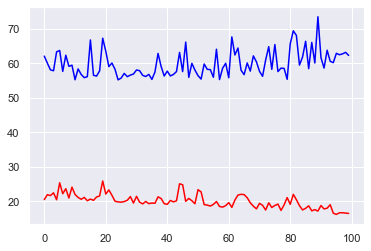

In [44]:
plt.plot(np.arange(len(res.history['loss'])), res.history['loss'], c='red', label='loss')
plt.plot(np.arange(len(res.history['val_loss'])), res.history['val_loss'], c='blue', label='val_loss')
plt.show()